### <mark style="background-color:yellow"><span style="color:blue">上班通勤時間最短的租房位置在哪?</span></mark>

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

In [175]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pickle


### Open and Read Datasets

In [176]:
import json

In [177]:
def open_read(txt_file):
    # reading the txt data by using JSON
    with open(txt_file, encoding='utf-8') as file:
        json_data = json.load(file)
        # converting json dataset from dictionary to dataframe
        df = pd.DataFrame(json_data)
    return df

In [178]:
exit_df = open_read('exit.txt')
station_df = open_read('station.txt')

### Splitting dictionary (inside a Pandas Column) into Separate Columns

In [179]:
def split_dict(df, column):
    keyvalue_df = pd.json_normalize(df[column])
    # give new column names(not key)
    keyvalue_df = keyvalue_df.add_prefix(column + '_')        
    return keyvalue_df

In [180]:
StationName_df = split_dict(exit_df, 'StationName')
ExitName_df = split_dict(exit_df, 'ExitName')
ExitPosition_df = split_dict(exit_df, 'ExitPosition')

exit_df = pd.concat([exit_df, StationName_df, ExitName_df, ExitPosition_df], axis=1)

exit_df.head(3)

,StationID,StationName,ExitID,ExitName,ExitPosition,LocationDescription,Stair,Escalator,Elevator,SrcUpdateTime,UpdateTime,VersionID,StationName_Zh_tw,StationName_En,ExitName_Zh_tw,ExitName_En,ExitPosition_PositionLat,ExitPosition_PositionLon,ExitPosition_GeoHash
0,R08,"{'Zh_tw': '中正紀念堂', 'En': 'Chiang Kai-Shek Memo...",5,"{'Zh_tw': '中正紀念堂站出口5', 'En': 'Chiang Kai-Shek ...","{'PositionLat': 25.035148, 'PositionLon': 121....",愛國東路、中山南路口、近中正紀念堂,True,1,True,2020-01-31T14:00:00+08:00,2020-05-20T12:00:00+08:00,2,中正紀念堂,Chiang Kai-Shek Memorial Hall,中正紀念堂站出口5,Chiang Kai-Shek Memorial Hall Exit 5,25.035148,121.517109,wsqqmjw03
1,R08,"{'Zh_tw': '中正紀念堂', 'En': 'Chiang Kai-Shek Memo...",3,"{'Zh_tw': '中正紀念堂站出口3', 'En': 'Chiang Kai-Shek ...","{'PositionLat': 25.032281, 'PositionLon': 121....",羅斯福路1段、近金華街口,True,2,False,2020-01-31T14:00:00+08:00,2020-05-20T12:00:00+08:00,2,中正紀念堂,Chiang Kai-Shek Memorial Hall,中正紀念堂站出口3,Chiang Kai-Shek Memorial Hall Exit 3,25.032281,121.519000,wsqqmhzrt
2,R08,"{'Zh_tw': '中正紀念堂', 'En': 'Chiang Kai-Shek Memo...",2,"{'Zh_tw': '中正紀念堂站出口2', 'En': 'Chiang Kai-Shek ...","{'PositionLat': 25.032406, 'PositionLon': 121....",羅斯福路1段8之1號、近南門市場、中正區公所,True,2,False,2020-01-31T14:00:00+08:00,2020-05-20T12:00:00+08:00,2,中正紀念堂,Chiang Kai-Shek Memorial Hall,中正紀念堂站出口2,Chiang Kai-Shek Memorial Hall Exit 2,25.032406,121.518261,wsqqmjnbk


In [181]:
StationName_df = split_dict(station_df, 'StationName')
StationPosition_df = split_dict(station_df, 'StationPosition')

station_df = pd.concat([station_df, StationName_df, StationPosition_df], axis=1)
station_df.head(3)
station_df[station_df['StationName_Zh_tw']=='南港展覽館']

,StationUID,StationID,StationName,StationAddress,BikeAllowOnHoliday,SrcUpdateTime,UpdateTime,VersionID,StationPosition,LocationCity,LocationCityCode,LocationTown,LocationTownCode,StationName_Zh_tw,StationName_En,StationPosition_PositionLat,StationPosition_PositionLon,StationPosition_GeoHash
20,TRTC-BR24,BR24,"{'Zh_tw': '南港展覽館', 'En': 'Taipei Nangang Exhib...",文湖線：115018臺北市南港區南港路1段32號,False,2020-11-01T00:00:00+08:00,2020-11-05T00:00:00+08:00,4,"{'PositionLat': 25.054919, 'PositionLon': 121....",臺北市,TPE,南港區,6300090,南港展覽館,Taipei Nangang Exhibition Center,25.054919,121.616861,wsqqx3neq
115,TRTC-BL23,BL23,"{'Zh_tw': '南港展覽館', 'En': 'Taipei Nangang Exhib...",板南線：115021臺北市南港區研究院路1段1號,True,2020-11-01T00:00:00+08:00,2020-11-05T00:00:00+08:00,4,"{'PositionLat': 25.054919, 'PositionLon': 121....",臺北市,TPE,南港區,6300090,南港展覽館,Taipei Nangang Exhibition Center,25.054919,121.616861,wsqqx3neq


### Check which row has any missing values

In [182]:
exit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   StationID                 387 non-null    object 
 1   StationName               387 non-null    object 
 2   ExitID                    387 non-null    object 
 3   ExitName                  387 non-null    object 
 4   ExitPosition              387 non-null    object 
 5   LocationDescription       387 non-null    object 
 6   Stair                     387 non-null    bool   
 7   Escalator                 387 non-null    int64  
 8   Elevator                  387 non-null    bool   
 9   SrcUpdateTime             387 non-null    object 
 10  UpdateTime                387 non-null    object 
 11  VersionID                 387 non-null    int64  
 12  StationName_Zh_tw         387 non-null    object 
 13  StationName_En            387 non-null    object 
 14  ExitName_Z

In [183]:
exit_df[exit_df.isnull().values==True]

,StationID,StationName,ExitID,ExitName,ExitPosition,LocationDescription,Stair,Escalator,Elevator,SrcUpdateTime,UpdateTime,VersionID,StationName_Zh_tw,StationName_En,ExitName_Zh_tw,ExitName_En,ExitPosition_PositionLat,ExitPosition_PositionLon,ExitPosition_GeoHash


In [184]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   StationUID                   135 non-null    object 
 1   StationID                    135 non-null    object 
 2   StationName                  135 non-null    object 
 3   StationAddress               135 non-null    object 
 4   BikeAllowOnHoliday           135 non-null    bool   
 5   SrcUpdateTime                135 non-null    object 
 6   UpdateTime                   135 non-null    object 
 7   VersionID                    135 non-null    int64  
 8   StationPosition              135 non-null    object 
 9   LocationCity                 135 non-null    object 
 10  LocationCityCode             135 non-null    object 
 11  LocationTown                 135 non-null    object 
 12  LocationTownCode             135 non-null    object 
 13  StationName_Zh_tw   

### Create a GeoDataFrame and Visualize the station position

In [185]:
import geopandas
from shapely import wkt
from graphics import Point
import scipy.stats as st

In [186]:
# mark different colors by MRT station lines 
def color_extract(color_ID):
    if color_ID[0:2] == 'BR':
        return 'brown'
    elif color_ID[0:1] == 'R':
        return 'red'
    elif color_ID[0:1] == 'Y':
        return 'yellow'
    elif color_ID[0:1] == 'B' or color_ID[0:2] == 'BL':
        return 'blue'
    elif color_ID[0:1] == 'O':
        return 'orange'
    elif color_ID[0:1] == 'G':
        return 'green'

station_df['Line_Color'] = station_df['StationID'].apply(color_extract)
try:
    station_df = station_df.drop(columns=['StationUID', 'StationID', 'StationName', 'StationAddress',
       'BikeAllowOnHoliday', 'SrcUpdateTime', 'UpdateTime', 'VersionID',
       'StationPosition', 'LocationCity', 'LocationCityCode', 'LocationTown',
       'LocationTownCode','StationPosition_GeoHash',"StationName_En"])
except:
    pass

stations = station_df.drop_duplicates(subset=["StationName_Zh_tw"]).set_index("StationName_Zh_tw").drop(index=["小碧潭","新北投"])
with open('all_time.pickle', 'rb') as handle:
    all_time = pickle.load(handle)
    handle.close()

heat_source = all_time["西湖"]
heat_source = pd.DataFrame(list(heat_source.items()),
                           columns=['Station', 'TakeTime']).set_index("Station")
stations["time"] = 1/ heat_source.TakeTime
stations

,StationPosition_PositionLat,StationPosition_PositionLon,Line_Color,time
StationName_Zh_tw,,,,
中正紀念堂,25.032767,121.518273,red,0.000767
象山,25.032395,121.570116,red,0.000480
中山國中,25.060850,121.544215,brown,0.001595
辛亥,25.005455,121.557046,brown,0.000695
圓山,25.071409,121.520074,red,0.000780
...,...,...,...,...
大安森林公園,25.033225,121.536151,red,0.000620
幸福,25.050282,121.460216,yellow,0.000407
永安市場,25.002895,121.511225,orange,0.000578


In [191]:
def get_heat(geo_df, ax, xlim, ylim):
    y = geo_df.StationPosition_PositionLat
    x = geo_df.StationPosition_PositionLon
    xmin, xmax = xlim
    ymin, ymax = ylim

    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    print(values.shape)
    kernel = st.gaussian_kde(values, weights=geo_df["time"])
#     kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    print(f.shape)
    mask = np.abs(f) < np.percentile(f,60)
    f[mask] = np.nan

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    # Contourf plot
    cfset = ax.contourf(xx, yy, f, cmap='Reds', zorder=1)
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    return kernel(positions).T

(2, 116)
(500, 500)


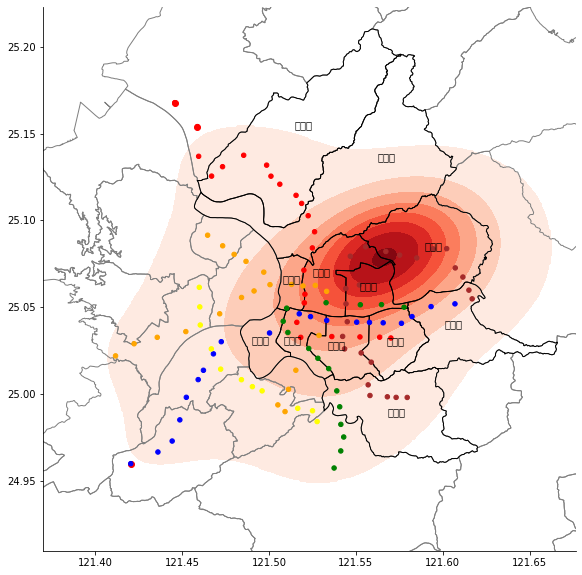

In [192]:
# Read file
taiwan = geopandas.read_file('./Taipei District/TOWN_MOI_1091016.shp', encoding='utf-8')
taipei_base_map = taiwan[taiwan['COUNTYNAME']=='臺北市']
new_taipei = taiwan[taiwan['COUNTYNAME']=='新北市']

# coords: 標註台北市各區名稱(座標)
taipei_base_map['coords'] = taipei_base_map['geometry'].apply(lambda x: x.representative_point().coords[:])
taipei_base_map['coords'] = [coords[0] for coords in taipei_base_map.loc[:, 'coords']]

# create plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
xlim = (121.37, 121.67637397645004)
ylim = (24.91, 25.222658830400047)

# plotting
latitudes = stations.loc[:, 'StationPosition_PositionLat']
longitudes = stations.loc[:,'StationPosition_PositionLon']
geo_df = geopandas.GeoDataFrame(stations, geometry = geopandas.points_from_xy(longitudes, latitudes))
geo_df.plot(ax = ax, color='red')
f = get_heat(geo_df, ax, xlim, ylim)
new_taipei.plot(facecolor="none", edgecolor='gray', ax=ax)
taipei_base_map.plot(facecolor="none", edgecolor='black', ax=ax)
for idx, row in taipei_base_map.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=row['coords'], horizontalalignment='center')

# plt setting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(longitudes, latitudes, s=20, c=stations['Line_Color'])
plt.show()

In [189]:
geo_df.head()

,StationPosition_PositionLat,StationPosition_PositionLon,Line_Color,time,geometry
StationName_Zh_tw,,,,,
中正紀念堂,25.032767,121.518273,red,0.000767,POINT (121.51827 25.03277)
象山,25.032395,121.570116,red,0.000480,POINT (121.57012 25.03240)
中山國中,25.060850,121.544215,brown,0.001595,POINT (121.54421 25.06085)
辛亥,25.005455,121.557046,brown,0.000695,POINT (121.55705 25.00546)
圓山,25.071409,121.520074,red,0.000780,POINT (121.52007 25.07141)


ValueError: 'c' argument has 135 elements, which is not acceptable for use with 'x' with size 116, 'y' with size 116.

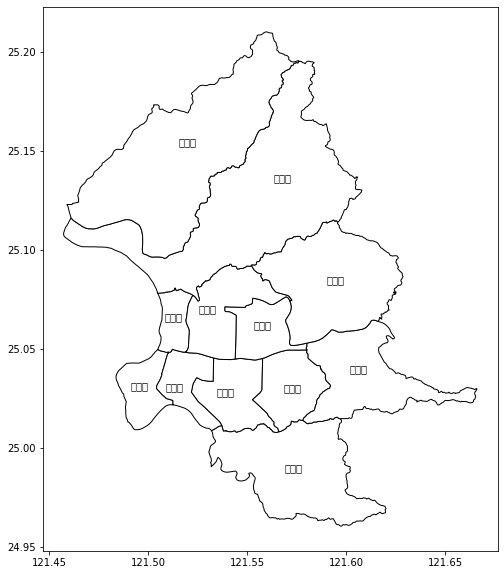

In [190]:
ax = taipei_base_map.plot(color='white', edgecolor='black', figsize=(10,10))

# 標註台北市各區名稱(座標)
taipei_base_map['coords'] = taipei_base_map['geometry'].apply(lambda x: x.representative_point().coords[:])
taipei_base_map['coords'] = [coords[0] for coords in taipei_base_map.loc[:, 'coords']]

for idx, row in taipei_base_map.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=row['coords'], horizontalalignment='center')

plt.scatter(longitudes, latitudes, s=20, c=station_df['Line_Color'])

plt.show()

In [ ]:
import seaborn as sb

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.kdeplot(heat_source.index, heat_source.TakeTime, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))

plt.show()